# Exploring Airbnb Market Trends

This R notebook focuses on analyzing Airbnb data to extract valuable insights within the competitive short-term rental market.

Thorugh various data cleaning and manipulation techniques, the analysis aims to uncover key aspects of private room listings within the competitive short-term rental market. The tasks involve extracting the earliest and latest review dates, quantifying the count of private room listings, and computing the average listing price, consolidating these findings into a structured dataset.

## Importing Libraries and Reading the Data

In [1]:
#importing libraries
suppressMessages(library(dplyr)) 
options(readr.show_types = FALSE)
library(readr)
library(readxl)
library(stringr)
library(ggplot2)

# Load the datasets
airbnb_price <- read_csv('airbnb_price.csv', show_col_types=FALSE)

airbnb_room_type <- read_excel('airbnb_room_type.xlsx')

airbnb_last_review <- read_tsv('airbnb_last_review.tsv', show_col_types=FALSE)

## Merging the datasets

In [2]:
# Merge the three data frames together into one
listings <- airbnb_price %>%
  inner_join(airbnb_room_type, by = "listing_id") %>%
  inner_join(airbnb_last_review, by = "listing_id")

listings

listing_id,price,nbhood_full,description,room_type,host_name,last_review
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019
3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019
5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019
5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019
5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019
5295,135 dollars,"Manhattan, Upper West Side",Beautiful 1br on Upper West Side,Entire home/apt,Lena,June 22 2019
5441,85 dollars,"Manhattan, Hell's Kitchen",Central Manhattan/near Broadway,Private room,Kate,June 23 2019
5803,89 dollars,"Brooklyn, South Slope","Lovely Room 1, Garden, Best Area, Legal rental",Private room,Laurie,June 24 2019
6021,85 dollars,"Manhattan, Upper West Side",Wonderful Guest Bedroom in Manhattan for SINGLES,Private room,Claudio,July 05 2019


## Exploring Trends in the Short-term Rental Market 

### Dates of the earliest and most recent reviews

In [5]:
#dates of the earliest and most recent reviews

review_dates <- listings %>%
  # Convert to date using the format 'Month DD YYYY'
  mutate(last_review_date = as.Date(last_review, format = "%B %d %Y")) %>%
  summarize(first_reviewed = min(last_review_date),
            last_reviewed = max(last_review_date))

review_dates

first_reviewed,last_reviewed
<date>,<date>
2019-01-01,2019-07-09


### Time series plot of listing counts over time

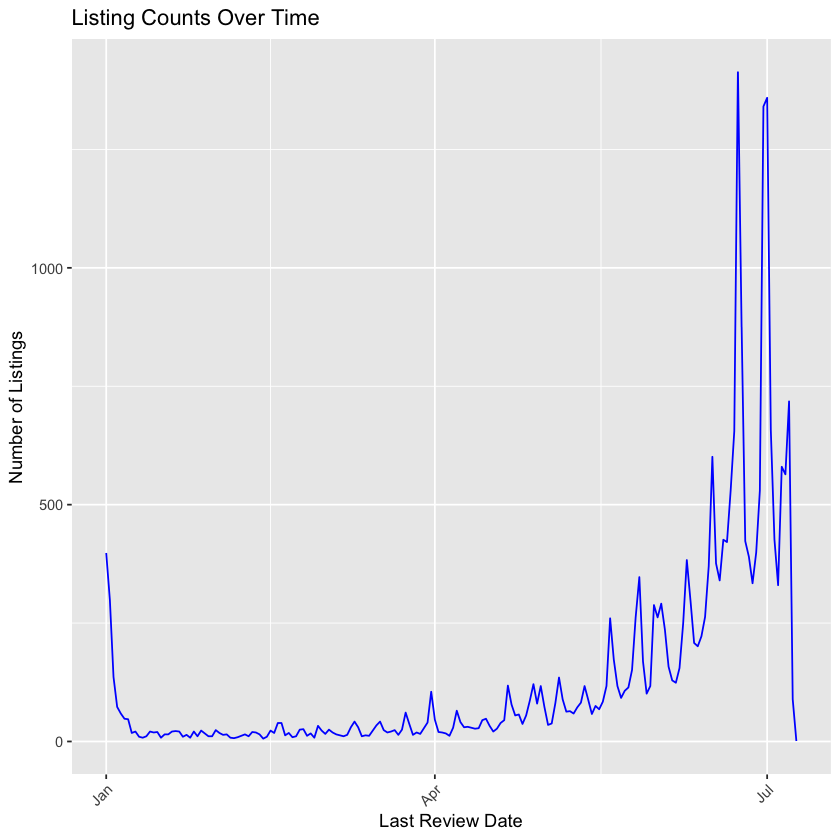

In [10]:
# Convert 'last_review_date' to Date format
listings <- listings %>%
  mutate(last_review_date = as.Date(last_review, format = "%B %d %Y"))

# Count listings by review date
listing_counts <- listings %>%
  group_by(last_review_date) %>%
  summarize(count = n())

# Time series plot of listing counts over time
ggplot(listing_counts, aes(x = last_review_date, y = count)) +
  geom_line(color = "blue") +
  labs(title = "Listing Counts Over Time", x = "Last Review Date", y = "Number of Listings") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


### Count of listings tagged as private rooms 

In [11]:
#count of listings tagged as private rooms

private_room_count <- listings %>%
  # Making capitalization consistent
  mutate(room_type = str_to_lower(room_type)) %>%
  count(room_type) %>%
  filter(room_type == "private room") 

# Extract number of rooms
nb_private_rooms <- private_room_count$n
nb_private_rooms

[1] 11356

### Average listing price 

In [12]:
#average listing price

avg_price <- listings %>%
  mutate(price_clean = str_remove(price, " dollars") %>%
        as.numeric()) %>%
  # Take the mean of price_clean
  summarize(avg_price = mean(price_clean)) %>%
  # Convert from a tibble to a single number
  as.numeric()

avg_price

[1] 141.7779

### Consolidating the Key Findings

In [13]:
#consolidating the key findings into 1 tibble

review_dates$nb_private_rooms = nb_private_rooms
review_dates$avg_price = round(avg_price, 2)

print(review_dates)

# A tibble: 1 × 4
  first_reviewed last_reviewed nb_private_rooms avg_price
  <date>         <date>                   <int>     <dbl>
1 2019-01-01     2019-07-09               11356      142.
